Installing dependencies

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 21.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.arima_model import ARIMA as arima
from statsmodels.tsa.statespace.sarimax import SARIMAX as sarimax
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
combined = pd.read_csv("/content/drive/MyDrive/asm_assignment2/combined4.csv",index_col=False)

In [ ]:
combined_sliced = combined.astype({'Wind Speed': np.float16,'Year': int,'Month': int,'Day':int,'Hour': int})
data_combined_weekly = combined_sliced.groupby(['Year', 'Month','Day'], as_index=False).mean()
data_combined_weekly.sort_values(by=['Year', 'Month','Day'],inplace=True)
cols = ['Day','Month','Year']
data_combined_weekly['date'] = data_combined_weekly[cols].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)

In [ ]:
data_combined_weekly.drop(['Unnamed: 0', 'Hour'], axis=1,inplace=True)
data_combined_weekly.head()

,Year,Month,Day,Wind Speed,date
0,2000,1,1,2.832031,1/1/2000
1,2000,1,2,2.927734,2/1/2000
2,2000,1,3,2.216797,3/1/2000
3,2000,1,4,1.925781,4/1/2000
4,2000,1,5,1.993164,5/1/2000


In [ ]:
data_combined_daily = data_combined_weekly.copy()

In [ ]:
import datetime

In [ ]:
data_combined_weekly['Week'] = 0
for i in range(len(data_combined_weekly)):
    data_combined_weekly['Week'][i] = datetime.date(data_combined_weekly['Year'][i], data_combined_weekly['Month'][i], data_combined_weekly['Day'][i]).isocalendar()[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_combined_weekly = data_combined_weekly.groupby(['Year','Week'], as_index=False).mean()

In [ ]:
data_combined_weekly.drop(['Day','Month'], axis=1,inplace=True)

In [ ]:
data_combined_weekly

,Year,Week,Wind Speed
0,2000,1,2.187500
1,2000,2,2.638672
2,2000,3,2.599609
3,2000,4,2.708984
4,2000,5,2.458984
...,...,...,...
779,2014,48,2.050781
780,2014,49,1.857422
781,2014,50,2.781250
782,2014,51,1.926758


In [ ]:
val_daily = data_combined_daily[data_combined_daily['Year']==2014]

In [ ]:
data_combined_daily.drop(data_combined_daily[data_combined_daily['Year'] == 2014].index, inplace = True)

In [ ]:
val_daily.reset_index(drop=True, inplace=True)
val_daily.head()

,Year,Month,Day,Wind Speed,date
0,2014,1,1,3.640625,1/1/2014
1,2014,1,2,2.742188,2/1/2014
2,2014,1,3,2.175781,3/1/2014
3,2014,1,4,2.181641,4/1/2014
4,2014,1,5,2.779297,5/1/2014


In [ ]:
val_weekly = data_combined_weekly[data_combined_weekly['Year']==2014]

In [ ]:
data_combined_weekly.drop(data_combined_weekly[data_combined_weekly['Year'] == 2014].index, inplace = True)

In [ ]:
val_weekly.reset_index(drop=True, inplace=True)
val_weekly.head()

,Year,Week,Wind Speed
0,2014,1,2.800781
1,2014,2,3.253906
2,2014,3,2.783203
3,2014,4,2.271484
4,2014,5,2.031250


**ADF test for daily data from 2000 to 2013**

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [ ]:
result = adfuller(data_combined_daily['Wind Speed'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.831689
p-value: 0.000000


**ADF test for weekly data from year 2000 to 2013**

In [ ]:
result = adfuller(data_combined_weekly['Wind Speed'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.573929
p-value: 0.000000


**Daily Wind Speed data from year 2000 to 2013**

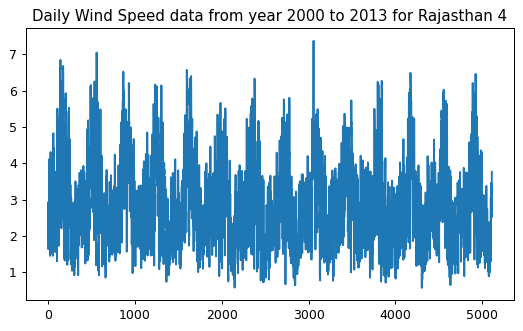

In [ ]:
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':90})
plt.plot(data_combined_daily['Wind Speed'])
plt.title('Daily Wind Speed data from year 2000 to 2013 for Rajasthan 4')
plt.show()

**Weekly Wind Speed data from year 2000 to 2013**

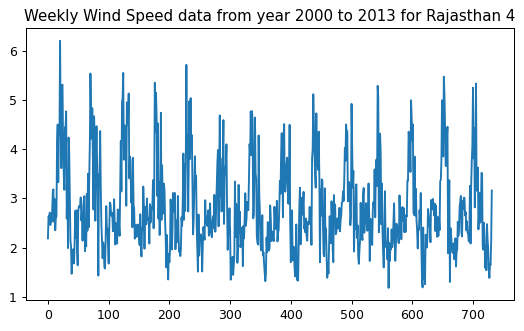

In [ ]:
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':90})
plt.plot(data_combined_weekly['Wind Speed'])
plt.title('Weekly Wind Speed data from year 2000 to 2013 for Rajasthan 4')
plt.show()

**Weekly Wind Speed data of year 2013**

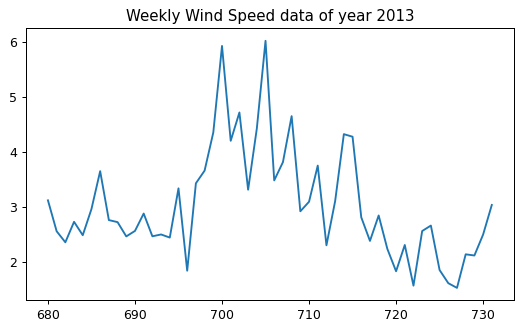

In [ ]:
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':90})
plt.plot(data_combined_weekly[data_combined_weekly['Year']==2013]['Wind Speed'])
plt.title('Weekly Wind Speed data of year 2013')
plt.show()

**PACF PLOT AND ACF PLOT OF DAILY DATA from 2000 to 2013**

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


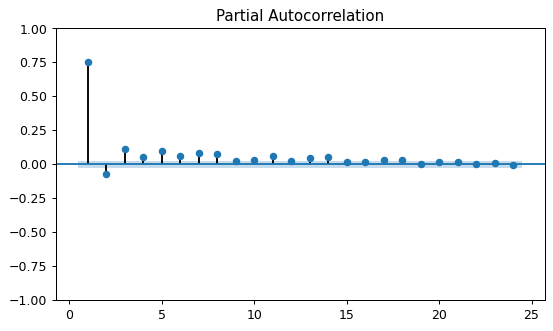

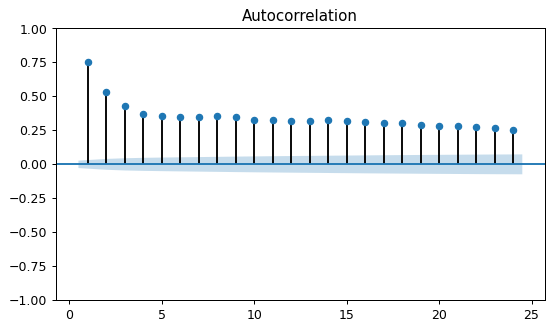

In [ ]:
plot_pacf(data_combined_daily['Wind Speed'],lags = np.arange(1,25));
plot_acf(data_combined_daily['Wind Speed'],lags = np.arange(1,25));

**PACF PLOT AND ACF PLOT OF DAILY DATA(differenced once) from 2000 to 2013**

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


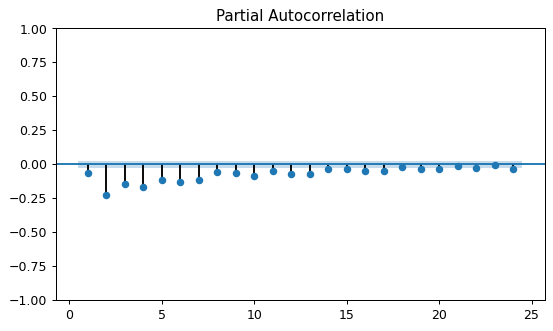

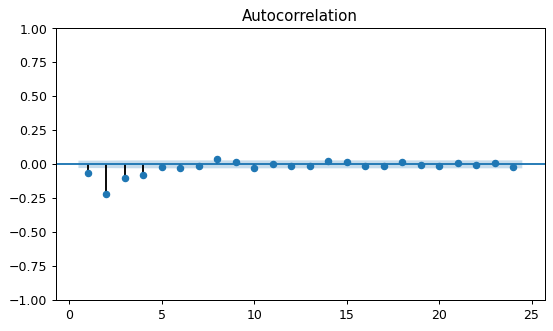

In [ ]:
plot_pacf(data_combined_daily['Wind Speed'].diff().dropna(),lags = np.arange(1,25));
plot_acf(data_combined_daily['Wind Speed'].diff().dropna(),lags = np.arange(1,25));

**PACF PLOT AND ACF PLOT OF WEEKLY DATA FROM 2000 TO 2013**

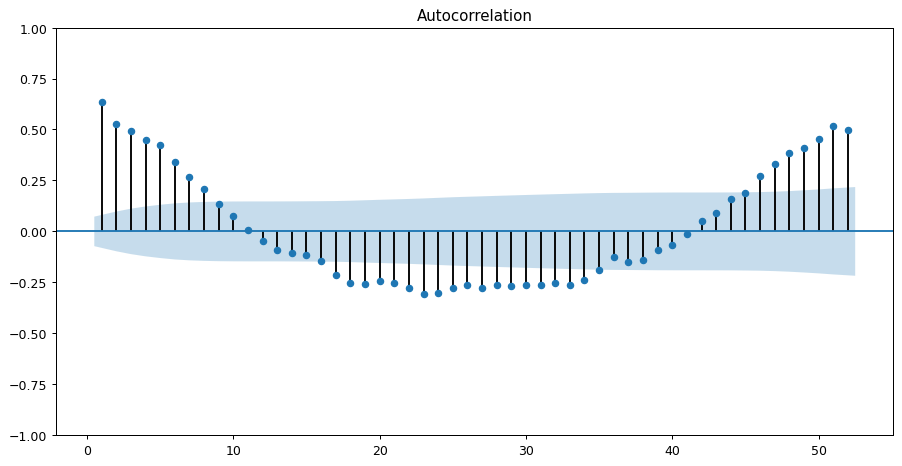

In [ ]:
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
#plot_pacf(data_combined_weekly['Wind Speed'],lags = np.arange(1,105), ax=ax);
plot_acf(data_combined_weekly['Wind Speed'],lags = np.arange(1,53), ax=ax);
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


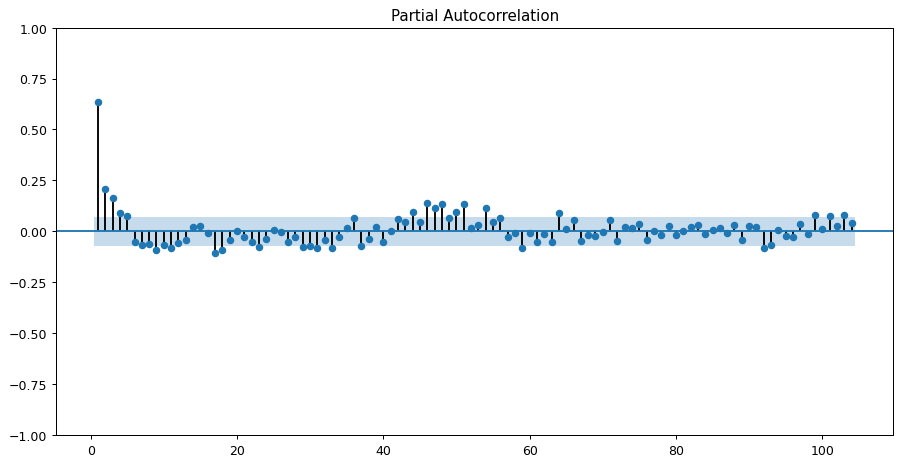

In [ ]:
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(data_combined_weekly['Wind Speed'],lags = np.arange(1,105), ax=ax);
#plot_acf(data_combined_weekly['Wind Speed'],lags = np.arange(1,53), ax=ax);
plt.show()

**PACF PLOT AND ACF PLOT OF WEEKLY DATA(differenced once) FROM 2000 TO 2013**

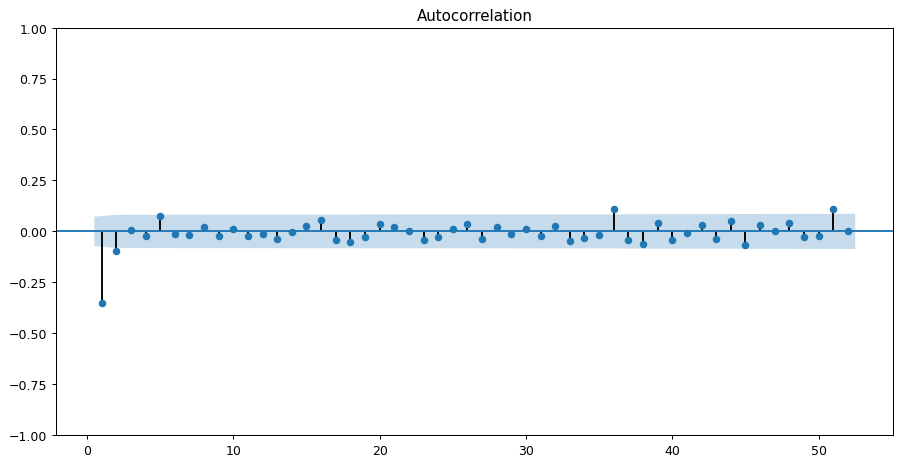

In [ ]:
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
#plot_pacf(data_combined_weekly['Wind Speed'],lags = np.arange(1,105), ax=ax);
plot_acf(data_combined_weekly['Wind Speed'].diff().dropna(),lags = np.arange(1,53), ax=ax);
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


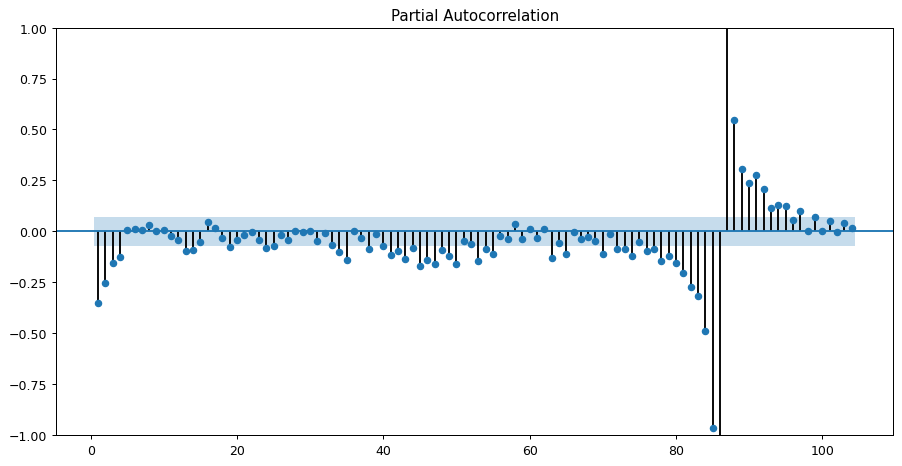

In [ ]:
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(data_combined_weekly['Wind Speed'].diff().dropna(),lags = np.arange(1,105), ax=ax);
#plot_acf(data_combined_weekly['Wind Speed'],lags = np.arange(1,53), ax=ax);
plt.show()

**ARIMA daily time series analysis from year 2000 to 2013**

In [ ]:
model = pm.auto_arima(data_combined_daily['Wind Speed'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=13108.110, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=26553.791, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=13128.460, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21159.849, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=13114.469, Time=1.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=12534.222, Time=1.54 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=18388.215, Time=0.71 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=12279.437, Time=3.56 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=12282.632, Time=4.75 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=12282.073, Time=1.70 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=12338.528, Time=2.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=12282.352, Time=2.85 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=4.09 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12246.578, Time=8.70 sec
 ARIMA(1,0,2)(0,0,0)[0] i

In [ ]:
train_data = data_combined_daily['Wind Speed'].to_numpy().tolist()
val_data = val_daily['Wind Speed'].to_numpy().tolist()
train_size = len(train_data)
val_size = len(val_data)
print(train_size,val_size)

5110 365


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train_data, order=(2,0,2))
model_fit = model.fit()
preds = model_fit.forecast(len(val_data))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test MSE: 1.435
Test MAPE: 0.357


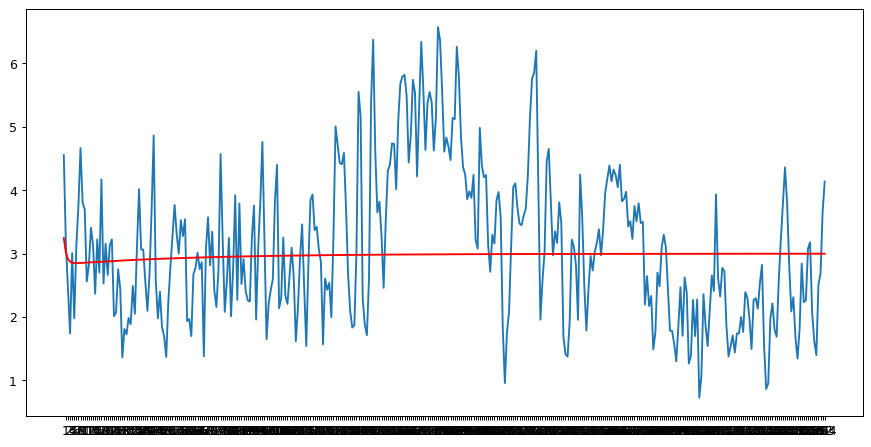

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
error = mean_squared_error(val_data, preds)
mape = mean_absolute_percentage_error(val_data, preds)
print('Test MSE: %.3f' % error)
print('Test MAPE: %.3f' % mape)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(val_data, label='actual')
plt.plot(preds, color='red', label='forecast')
plt.xticks(np.arange(1,len(val_data),1))
fig1 = plt.gcf()
fig1.savefig("daily_arima.png",dpi=500)
plt.show()

**ARIMA weekly time series analysis from year 2000 to 2013**

In [ ]:
model = pm.auto_arima(data_combined_weekly['Wind Speed'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1621.640, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3758.730, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1771.870, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3039.005, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1619.369, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1683.264, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1618.512, Time=0.35 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1639.421, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1616.453, Time=0.53 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1619.317, Time=0.50 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1611.401, Time=1.09 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1618.617, Time=0.55 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1568.888, Time=1.86 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1554.494, Time=1.91 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept

In [ ]:
train_data = data_combined_weekly['Wind Speed'].to_numpy().tolist()
val_data = val_weekly['Wind Speed'].to_numpy().tolist()
train_size = len(train_data)
val_size = len(val_data)
print(train_size,val_size)

732 52


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train_data, order=(2,0,3))
model_fit = model.fit()
preds = model_fit.forecast(len(val_data))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Test MSE: 0.779
Test MAPE: 0.235


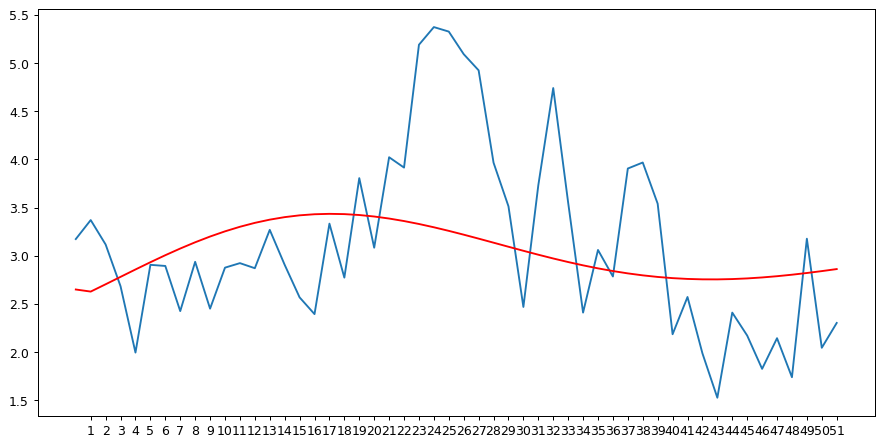

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
error = mean_squared_error(val_data, preds)
mape = mean_absolute_percentage_error(val_data, preds)
print('Test MSE: %.3f' % error)
print('Test MAPE: %.3f' % mape)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(val_data, label='actual')
plt.plot(preds, color='red', label='forecast')
plt.xticks(np.arange(1,len(val_data),1))
fig1 = plt.gcf()
fig1.savefig("weekly_arima.png",dpi=500)
plt.show()

**SARIMA daily time series analysis from year 2000 to 2013**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append({'param' : param , 'aic' : aic})
        print(*param , ' ' , 'aic score: ', aic)
    result_df = pd.DataFrame(results)
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
from itertools import product
p = range(0, 3, 1)
d = 1
q = range(0, 3, 1)
P = range(0, 3, 1)
D = 1
Q = range(0, 3, 1)
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

81


In [ ]:
from tqdm import tqdm_notebook

In [ ]:
result_df = optimize_SARIMA(parameters_list, 0, 1, 52, data_combined_weekly['Wind Speed'])
result_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/81 [00:00<?, ?it/s]

0 0 0 0   aic score:  1766.0657654710126
0 0 0 1   aic score:  1513.9054542779595
0 0 0 2   aic score:  1514.1870610747446
0 0 1 0   aic score:  1587.2169324751685
0 0 1 1   aic score:  1514.2857203992944
0 0 1 2   aic score:  1513.3181713886847
0 0 2 0   aic score:  1546.0128393831624
0 0 2 1   aic score:  1516.1372385411996
0 0 2 2   aic score:  1515.284316691871
0 1 0 0   aic score:  1746.8248522279014
0 1 0 1   aic score:  1479.0528734730851
0 1 0 2   aic score:  1480.1429933732916
0 1 1 0   aic score:  1567.718612475371
0 1 1 1   aic score:  1480.1754669304034
0 1 1 2   aic score:  1479.8953434777322
0 1 2 0   aic score:  1521.2065636731068
0 1 2 1   aic score:  1482.1014713895702
0 1 2 2   aic score:  1481.8948220114003
0 2 0 0   aic score:  1748.5782883361853
0 2 0 1   aic score:  1479.9671758589989
0 2 0 2   aic score:  1481.235514376171
0 2 1 0   aic score:  1568.423776021869
0 2 1 1   aic score:  1481.2634313534772
0 2 1 2   aic score:  1480.9053155391464
0 2 2 0   aic score:

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1 1 1 2   aic score:  1479.2879715344914
1 1 2 0   aic score:  1522.9020630192517
1 1 2 1   aic score:  1481.7573191773695


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1 1 2 2   aic score:  1481.2707849068565
1 2 0 0   aic score:  1746.1005463268928
1 2 0 1   aic score:  1482.919372445318
1 2 0 2   aic score:  1484.0551027146983
1 2 1 0   aic score:  1570.0578416841095
1 2 1 1   aic score:  1484.0862014792745


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1 2 1 2   aic score:  1483.7522847232772
1 2 2 0   aic score:  1524.607836658525
1 2 2 1   aic score:  1486.012393394304


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1 2 2 2   aic score:  1485.785918376435
2 0 0 0   aic score:  1748.7400724845738
2 0 0 1   aic score:  1478.760216551578
2 0 0 2   aic score:  1480.1655968168643
2 0 1 0   aic score:  1568.7182802853226
2 0 1 1   aic score:  1480.1921214623296
2 0 1 2   aic score:  1479.6958181198465
2 0 2 0   aic score:  1523.5211077766921
2 0 2 1   aic score:  1482.052609357067
2 0 2 2   aic score:  1481.682635307342
2 1 0 0   aic score:  1750.6583242609354
2 1 0 1   aic score:  1474.264153892839
2 1 0 2   aic score:  1475.2050601586448
2 1 1 0   aic score:  1570.202064791632
2 1 1 1   aic score:  1475.2716459669386
2 1 1 2   aic score:  1474.83055600919
2 1 2 0   aic score:  1524.6328852384877
2 1 2 1   aic score:  1476.9779000408337
2 1 2 2   aic score:  1476.8082597353678
2 2 0 0   aic score:  1747.840453090388
2 2 0 1   aic score:  1474.5363074759955
2 2 0 2   aic score:  1475.193559622991
2 2 1 0   aic score:  1571.9798936113098
2 2 1 1   aic score:  1475.2761194853847


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 2 1 2   aic score:  1475.0199806761325
2 2 2 0   aic score:  1526.6105044480355
2 2 2 1   aic score:  1477.0059046969334


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 2 2 2   aic score:  1476.9834018956944


,param,aic
0,"(2, 1, 0, 1)",1474.264154
1,"(2, 2, 0, 1)",1474.536307
2,"(2, 1, 1, 2)",1474.830556
3,"(2, 2, 1, 2)",1475.019981
4,"(2, 2, 0, 2)",1475.193560
...,...,...
76,"(1, 1, 0, 0)",1748.431339
77,"(0, 2, 0, 0)",1748.578288
78,"(2, 0, 0, 0)",1748.740072
79,"(2, 1, 0, 0)",1750.658324


In [ ]:
model = ARIMA(data_combined_daily['Wind Speed'], order=(2,0,3), seasonal_order=(0, 1, 1, 365))
best_model = model.fit(method='innovations_mle', low_memory=True, cov_type='none')
print(best_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima/model.py:405: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  ' estimation by method "%s".' % method)


KeyboardInterrupt: ignored

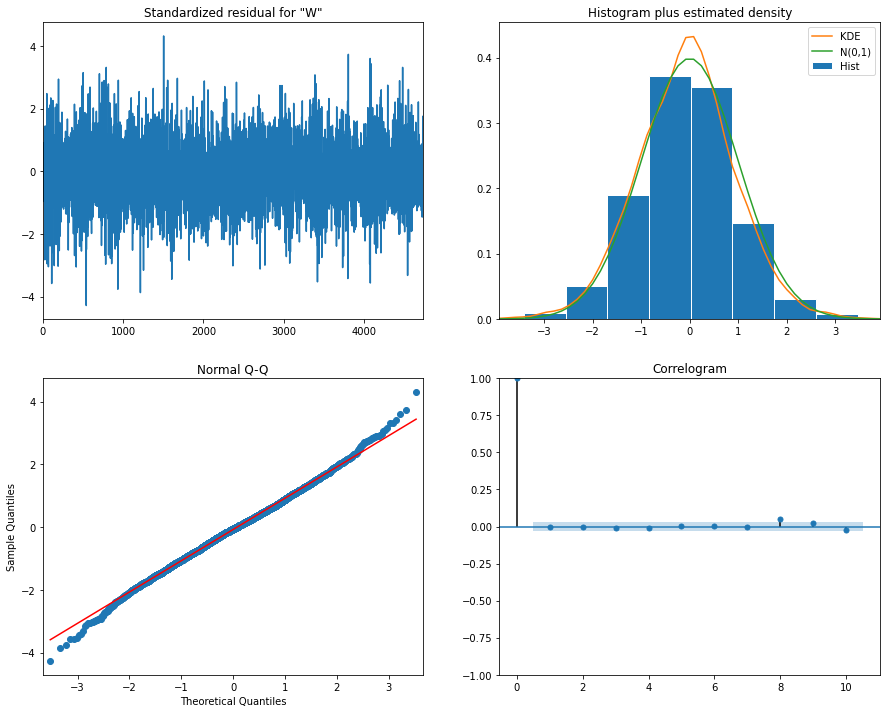

In [ ]:
best_model.plot_diagnostics(figsize=(15,12));

In [ ]:
preds = best_model.forecast(steps =len(val_daily['Wind Speed']))

In [ ]:
preds.reset_index(drop=True, inplace=True)

Test MSE: 1.050
Test MAPE: 0.299


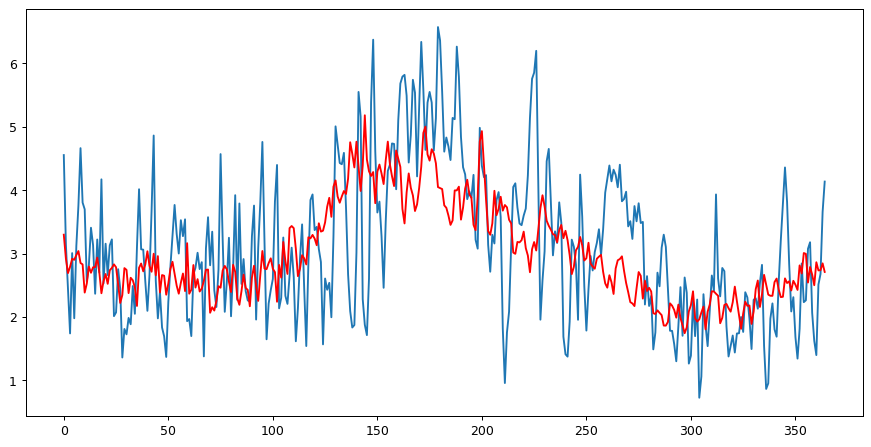

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
error = mean_squared_error(val_daily['Wind Speed'], preds)
mape = mean_absolute_percentage_error(val_daily['Wind Speed'], preds)
print('Test MSE: %.3f' % error)
print('Test MAPE: %.3f' % mape)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(val_daily['Wind Speed'])
plt.plot(preds, color='red')
fig1 = plt.gcf()
fig1.savefig("Year2014_sarimaPred_daily.png",dpi=500)
plt.show()

**SARIMA weekly time series analysis from year 2000 to 2013**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append({'param' : param , 'aic' : aic})
        print(*param , ' ' , 'aic score: ', aic)
    result_df = pd.DataFrame(results)
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
from itertools import product
p = range(0, 3, 1)
d = 1
q = range(0, 3, 1)
P = range(0, 3, 1)
D = 1
Q = range(0, 3, 1)
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

81


In [ ]:
from tqdm import tqdm_notebook

In [ ]:
result_df = optimize_SARIMA(parameters_list, 0, 1, 52, data_combined_weekly['Wind Speed'])
result_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/81 [00:00<?, ?it/s]

0 0 0 0   aic score:  1766.0657654710126
0 0 0 1   aic score:  1513.9054542779595
0 0 0 2   aic score:  1514.1870610747446
0 0 1 0   aic score:  1587.2169324751685
0 0 1 1   aic score:  1514.2857203992944
0 0 1 2   aic score:  1513.3181713886847
0 0 2 0   aic score:  1546.0128393831624
0 0 2 1   aic score:  1516.1372385411996
0 0 2 2   aic score:  1515.284316691871
0 1 0 0   aic score:  1746.8248522279014
0 1 0 1   aic score:  1479.0528734730851
0 1 0 2   aic score:  1480.1429933732916
0 1 1 0   aic score:  1567.718612475371
0 1 1 1   aic score:  1480.1754669304034
0 1 1 2   aic score:  1479.8953434777322
0 1 2 0   aic score:  1521.2065636731068
0 1 2 1   aic score:  1482.1014713895702
0 1 2 2   aic score:  1481.8948220114003
0 2 0 0   aic score:  1748.5782883361853
0 2 0 1   aic score:  1479.9671758589989
0 2 0 2   aic score:  1481.235514376171
0 2 1 0   aic score:  1568.423776021869
0 2 1 1   aic score:  1481.2634313534772
0 2 1 2   aic score:  1480.9053155391464
0 2 2 0   aic score:

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1 1 1 2   aic score:  1479.2879715344914
1 1 2 0   aic score:  1522.9020630192517
1 1 2 1   aic score:  1481.7573191773695


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1 1 2 2   aic score:  1481.2707849068565
1 2 0 0   aic score:  1746.1005463268928
1 2 0 1   aic score:  1482.919372445318
1 2 0 2   aic score:  1484.0551027146983
1 2 1 0   aic score:  1570.0578416841095
1 2 1 1   aic score:  1484.0862014792745


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1 2 1 2   aic score:  1483.7522847232772
1 2 2 0   aic score:  1524.607836658525
1 2 2 1   aic score:  1486.012393394304


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


1 2 2 2   aic score:  1485.785918376435
2 0 0 0   aic score:  1748.7400724845738
2 0 0 1   aic score:  1478.760216551578
2 0 0 2   aic score:  1480.1655968168643
2 0 1 0   aic score:  1568.7182802853226
2 0 1 1   aic score:  1480.1921214623296
2 0 1 2   aic score:  1479.6958181198465
2 0 2 0   aic score:  1523.5211077766921
2 0 2 1   aic score:  1482.052609357067
2 0 2 2   aic score:  1481.682635307342
2 1 0 0   aic score:  1750.6583242609354
2 1 0 1   aic score:  1474.264153892839
2 1 0 2   aic score:  1475.2050601586448
2 1 1 0   aic score:  1570.202064791632
2 1 1 1   aic score:  1475.2716459669386
2 1 1 2   aic score:  1474.83055600919
2 1 2 0   aic score:  1524.6328852384877
2 1 2 1   aic score:  1476.9779000408337
2 1 2 2   aic score:  1476.8082597353678
2 2 0 0   aic score:  1747.840453090388
2 2 0 1   aic score:  1474.5363074759955
2 2 0 2   aic score:  1475.193559622991
2 2 1 0   aic score:  1571.9798936113098
2 2 1 1   aic score:  1475.2761194853847


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 2 1 2   aic score:  1475.0199806761325
2 2 2 0   aic score:  1526.6105044480355
2 2 2 1   aic score:  1477.0059046969334


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 2 2 2   aic score:  1476.9834018956944


,param,aic
0,"(2, 1, 0, 1)",1474.264154
1,"(2, 2, 0, 1)",1474.536307
2,"(2, 1, 1, 2)",1474.830556
3,"(2, 2, 1, 2)",1475.019981
4,"(2, 2, 0, 2)",1475.193560
...,...,...
76,"(1, 1, 0, 0)",1748.431339
77,"(0, 2, 0, 0)",1748.578288
78,"(2, 0, 0, 0)",1748.740072
79,"(2, 1, 0, 0)",1750.658324


In [ ]:
best_model = SARIMAX(data_combined_weekly['Wind Speed'], order=(2, 0, 3), seasonal_order=(0, 1, 1, 52)).fit(dis=-1)
print(best_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  FutureWarning


                                      SARIMAX Results                                       
Dep. Variable:                           Wind Speed   No. Observations:                  732
Model:             SARIMAX(2, 0, 3)x(0, 1, [1], 52)   Log Likelihood                -731.124
Date:                              Mon, 06 Dec 2021   AIC                           1476.247
Time:                                      12:12:09   BIC                           1507.902
Sample:                                           0   HQIC                          1488.500
                                              - 732                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2104      0.531      0.396      0.692      -0.830       1.251
ar.L2          0.59

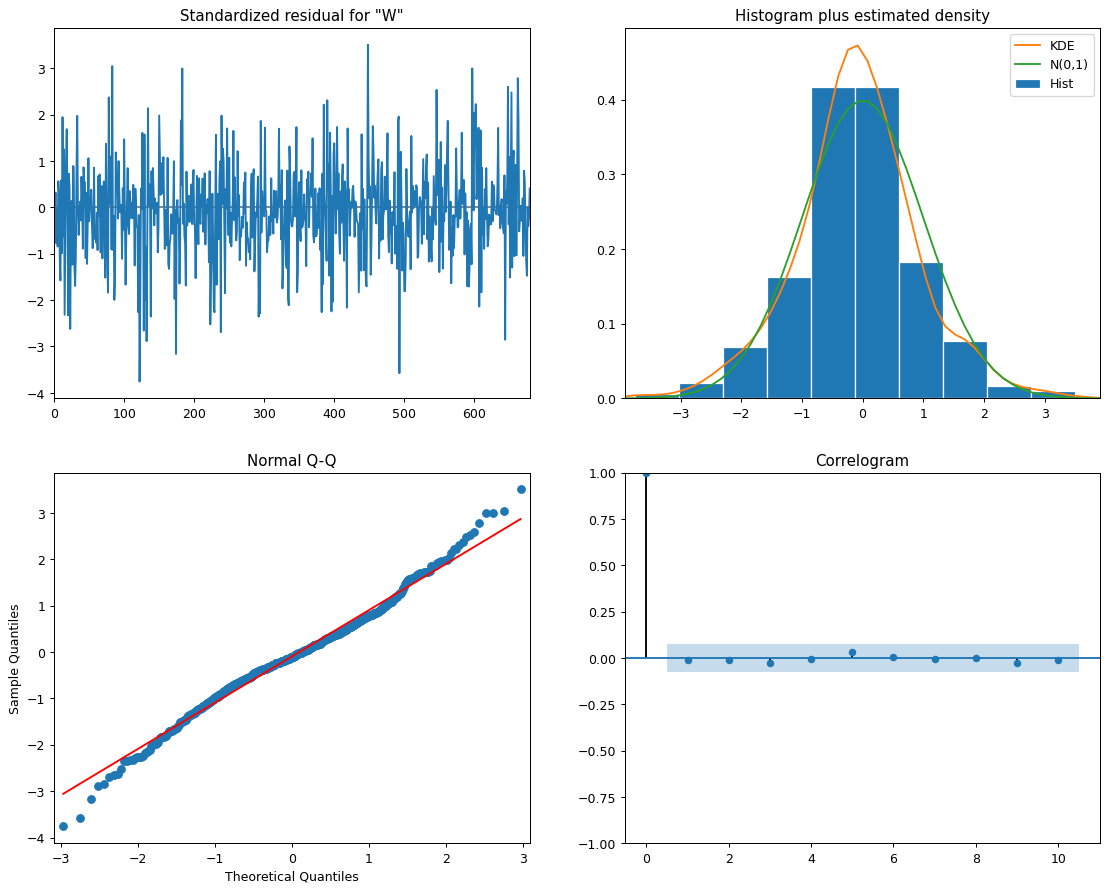

In [ ]:
best_model.plot_diagnostics(figsize=(15,12));

In [ ]:
preds = best_model.forecast(steps = 52)

In [ ]:
preds.reset_index(drop=True, inplace=True)

Test MSE: 0.545
Test MAPE: 0.184


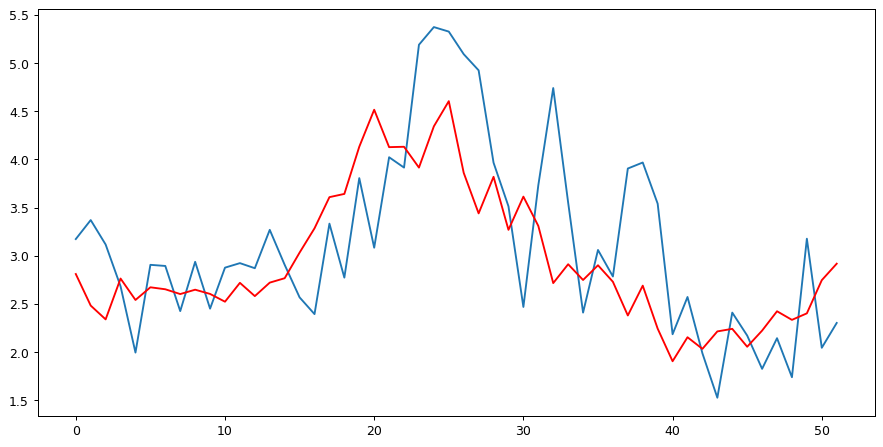

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
error = mean_squared_error(val_weekly['Wind Speed'], preds)
mape = mean_absolute_percentage_error(val_weekly['Wind Speed'], preds)
print('Test MSE: %.3f' % error)
print('Test MAPE: %.3f' % mape)
# plot
plt.plot(val_weekly['Wind Speed'])
plt.plot(preds, color='red')
fig1 = plt.gcf()
fig1.savefig("Year2014_sarimaPred.png",dpi=500)
plt.show()